정상일반인증키4359594f78726e6a313036457356744b 
import requests

url = 'http://openapi.seoul.go.kr:8088/sample/xml/CardSubwayStatsNew/1/5/20220301'

In [4]:
csv_list = None

with open("info_metro.csv", "r", encoding ='euc-kr') as f:
    info_metro = f.readlines()

print(info_metro)

FileNotFoundError: [Errno 2] No such file or directory: 'info_metro.csv'

In [ ]:
try:
    with open("info_metro.csv", "r", encoding ='euc-kr') as f:
        info_metro = f.readlines()
        for i in range(5):
            print(info_metro[i].strip())
except Exception as e:
    print("파일 처리 실패",e)
finally:
    print('-'*30)
    print('파일 처리 성공')

연번,역번호,호선,역명,역전화번호,도로명주소,지번주소
1,150,1,서울,02-6110-1331,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
2,151,1,시청,02-6110-1321,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선)
3,152,1,종각,02-6110-1311,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선)
4,153,1,종로3가,02-6110-1301,서울특별시 종로구 종로 지하129(종로3가),서울특별시 종로구 종로3가 10-5 종로3가역(1호선)
------------------------------
파일 처리 성공


In [ ]:
import pandas as pd
import requests
import time

In [ ]:
file_path = 'info_metro.csv'
df = pd.read_csv(file_path, encoding ='euc-kr')
print(df.head())
print(df.columns)

   연번  역번호  호선    역명         역전화번호                       도로명주소  \
0   1  150   1    서울  02-6110-1331  서울특별시 중구 세종대로 지하2(남대문로 5가)   
1   2  151   1    시청  02-6110-1321     서울특별시 중구 세종대로 지하101(정동)   
2   3  152   1    종각  02-6110-1311     서울특별시 종로구 종로 지하55(종로1가)   
3   4  153   1  종로3가  02-6110-1301    서울특별시 종로구 종로 지하129(종로3가)   
4   5  154   1  종로5가  02-6110-1291    서울특별시 종로구 종로 지하216(종로5가)   

                             지번주소  
0   서울특별시 중구 남대문로5가 73-6 서울역(1호선)  
1        서울특별시 중구 정동 5-5 시청역(1호선)  
2      서울특별시 종로구 종로1가 54 종각역(1호선)  
3  서울특별시 종로구 종로3가 10-5 종로3가역(1호선)  
4  서울특별시 종로구 종로5가 82-1 종로5가역(1호선)  
Index(['연번', '역번호', '호선', '역명', '역전화번호', '도로명주소', '지번주소'], dtype='object')


In [ ]:
URL = 'https://api.vworld.kr/req/address?'
API_KEY = 'C0401392-5E7C-3B9B-B504-7F063AB0F613'

In [ ]:
df = pd.read_csv("info_metro.csv", encoding = "euc-kr")

In [ ]:
lat_list = []
lon_list = []

for i in range(len(df)):
    address = df.loc[i, '도로명주소']     
    print(f"{i+1}번째 도로명주소: {address}")

    params = {
        "service": "address",
        "request": "getCoord",
        "version": "2.0",
        "crs": "EPSG:4326",
        "address": address,
        "refine": "true",
        "simple": "false",
        "format": "json",
        "type": "road",  
        "key": API_KEY
    }

    response = requests.get(URL, params=params)

    if response.status_code == 200:
        data = response.json()

        try:
            if data["response"]["status"] == "OK":
                x = data["response"]["result"]["point"]["x"]  # 경도
                y = data["response"]["result"]["point"]["y"]  # 위도

                print(f"   → 변환 성공! 위도:{y}, 경도:{x}")

                lat_list.append(y)
                lon_list.append(x)
            else:
                print("   →  실패, 주소를 찾을 수 없음")
                lat_list.append(None)
                lon_list.append(None)
        except:
            print("   → 오류, 데이터 구조가 다름")
            lat_list.append(None)
            lon_list.append(None)

    else:
        print("   → 서버 응답 실패:", response.status_code)
        lat_list.append(None)
        lon_list.append(None)

df['위도'] = lat_list
df['경도'] = lon_list

df.to_csv("지하철역_좌표_결과.csv", index=False, encoding="utf-8")

1번째 도로명주소: 서울특별시 중구 세종대로 지하2(남대문로 5가)
   →  실패, 주소를 찾을 수 없음
2번째 도로명주소: 서울특별시 중구 세종대로 지하101(정동)
   → 변환 성공! 위도:37.566700969, 경도:126.978346780
3번째 도로명주소: 서울특별시 종로구 종로 지하55(종로1가)
   → 변환 성공! 위도:37.573411520, 경도:127.022379505
4번째 도로명주소: 서울특별시 종로구 종로 지하129(종로3가)
   → 변환 성공! 위도:37.573411520, 경도:127.022379505
5번째 도로명주소: 서울특별시 종로구 종로 지하216(종로5가)
   → 변환 성공! 위도:37.573411520, 경도:127.022379505
6번째 도로명주소: 서울특별시 종로구 종로 지하302(창신동)
   → 변환 성공! 위도:37.573411520, 경도:127.022379505
7번째 도로명주소: 서울특별시 동대문구 왕산로 지하1(신설동)
   → 변환 성공! 위도:37.574718822, 경도:127.025093705
8번째 도로명주소: 서울특별시 동대문구 왕산로 지하93(제기동)
   → 변환 성공! 위도:37.576899695, 경도:127.026716062
9번째 도로명주소: 서울특별시 동대문구 왕산로 지하205(전농동)
   → 변환 성공! 위도:37.576899695, 경도:127.026716062
10번째 도로명주소: 서울특별시 종로구 종로 359(숭인동)
   → 변환 성공! 위도:37.573421235, 경도:127.017046549
11번째 도로명주소: 서울특별시 중구 서소문로 지하127(서소문동)
   → 변환 성공! 위도:37.558986276, 경도:126.963137882
12번째 도로명주소: 서울특별시 중구 을지로 지하42(을지로1가)
   → 변환 성공! 위도:37.566317667, 경도:126.980410427
13번째 도로명주소: 서울특별시 중구 을지로 지하106(을지로3가)
  

In [ ]:
df["위도"] = lat_list
df["경도"] = lon_list

In [ ]:
output_path = "서울시_지하철역_좌표_결과.xlsx"
df.to_excel(output_path, index=False)

print("\n 변환 완료! ->", output_path)


 변환 완료! -> 서울시_지하철역_좌표_결과.xlsx


# 과제 - boston

In [6]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
import numpy as np
from pandas import DataFrame
from hossam import load_data

## 데이터 기본정보파악

In [7]:
origin = load_data('boston')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 결측치 확인

In [8]:
origin.isna().sum()

# 데이터 완성도: 전체 데이터에 대한 누락이 없으므로 시계열 연속성 보장 및 추세 분석 가능

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df1 = origin.astype({'CHAS': 'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [10]:
df2 = df1.copy()
df2 = df2.filter(['MEDV','CRIM','RM','LSTAT', 'NOX'])
df2

,MEDV,CRIM,RM,LSTAT,NOX
0,24.0,0.00632,6.575,4.98,0.538
1,21.6,0.02731,6.421,9.14,0.469
2,34.7,0.02729,7.185,4.03,0.469
3,33.4,0.03237,6.998,2.94,0.458
4,36.2,0.06905,7.147,5.33,0.458
...,...,...,...,...,...
501,22.4,0.06263,6.593,9.67,0.573
502,20.6,0.04527,6.120,9.08,0.573
503,23.9,0.06076,6.976,5.64,0.573
504,22.0,0.10959,6.794,6.48,0.573


In [11]:
df2[['MEDV','CRIM','RM','LSTAT', 'NOX']].describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


- MEDV: 평균> 중위수
- CRIM: 평균 > 중위수
- RM: 평균 > 중위수
- LSTAT: 평균 > 중위수
- NOX: 평균 > 중위수
- 5가지의 변수 모두 우편향 그래프를 보인다. 즉 이상치가 많이 분포되어있다.

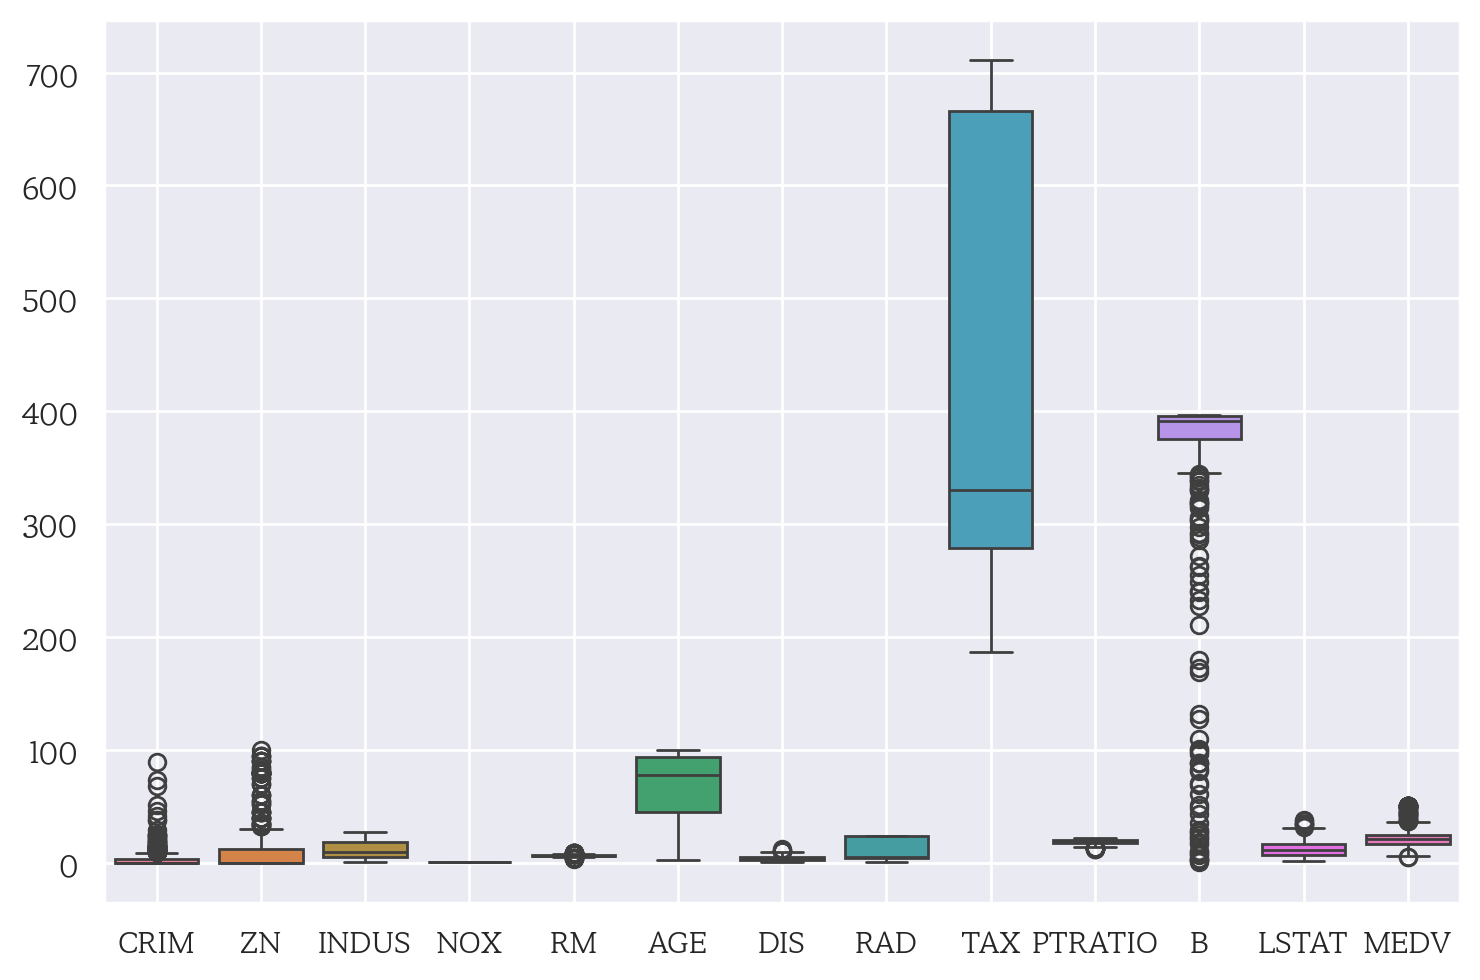

In [12]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

width_px = 1500
height_px = 1000
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df1, orient = 'v')

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()

- 

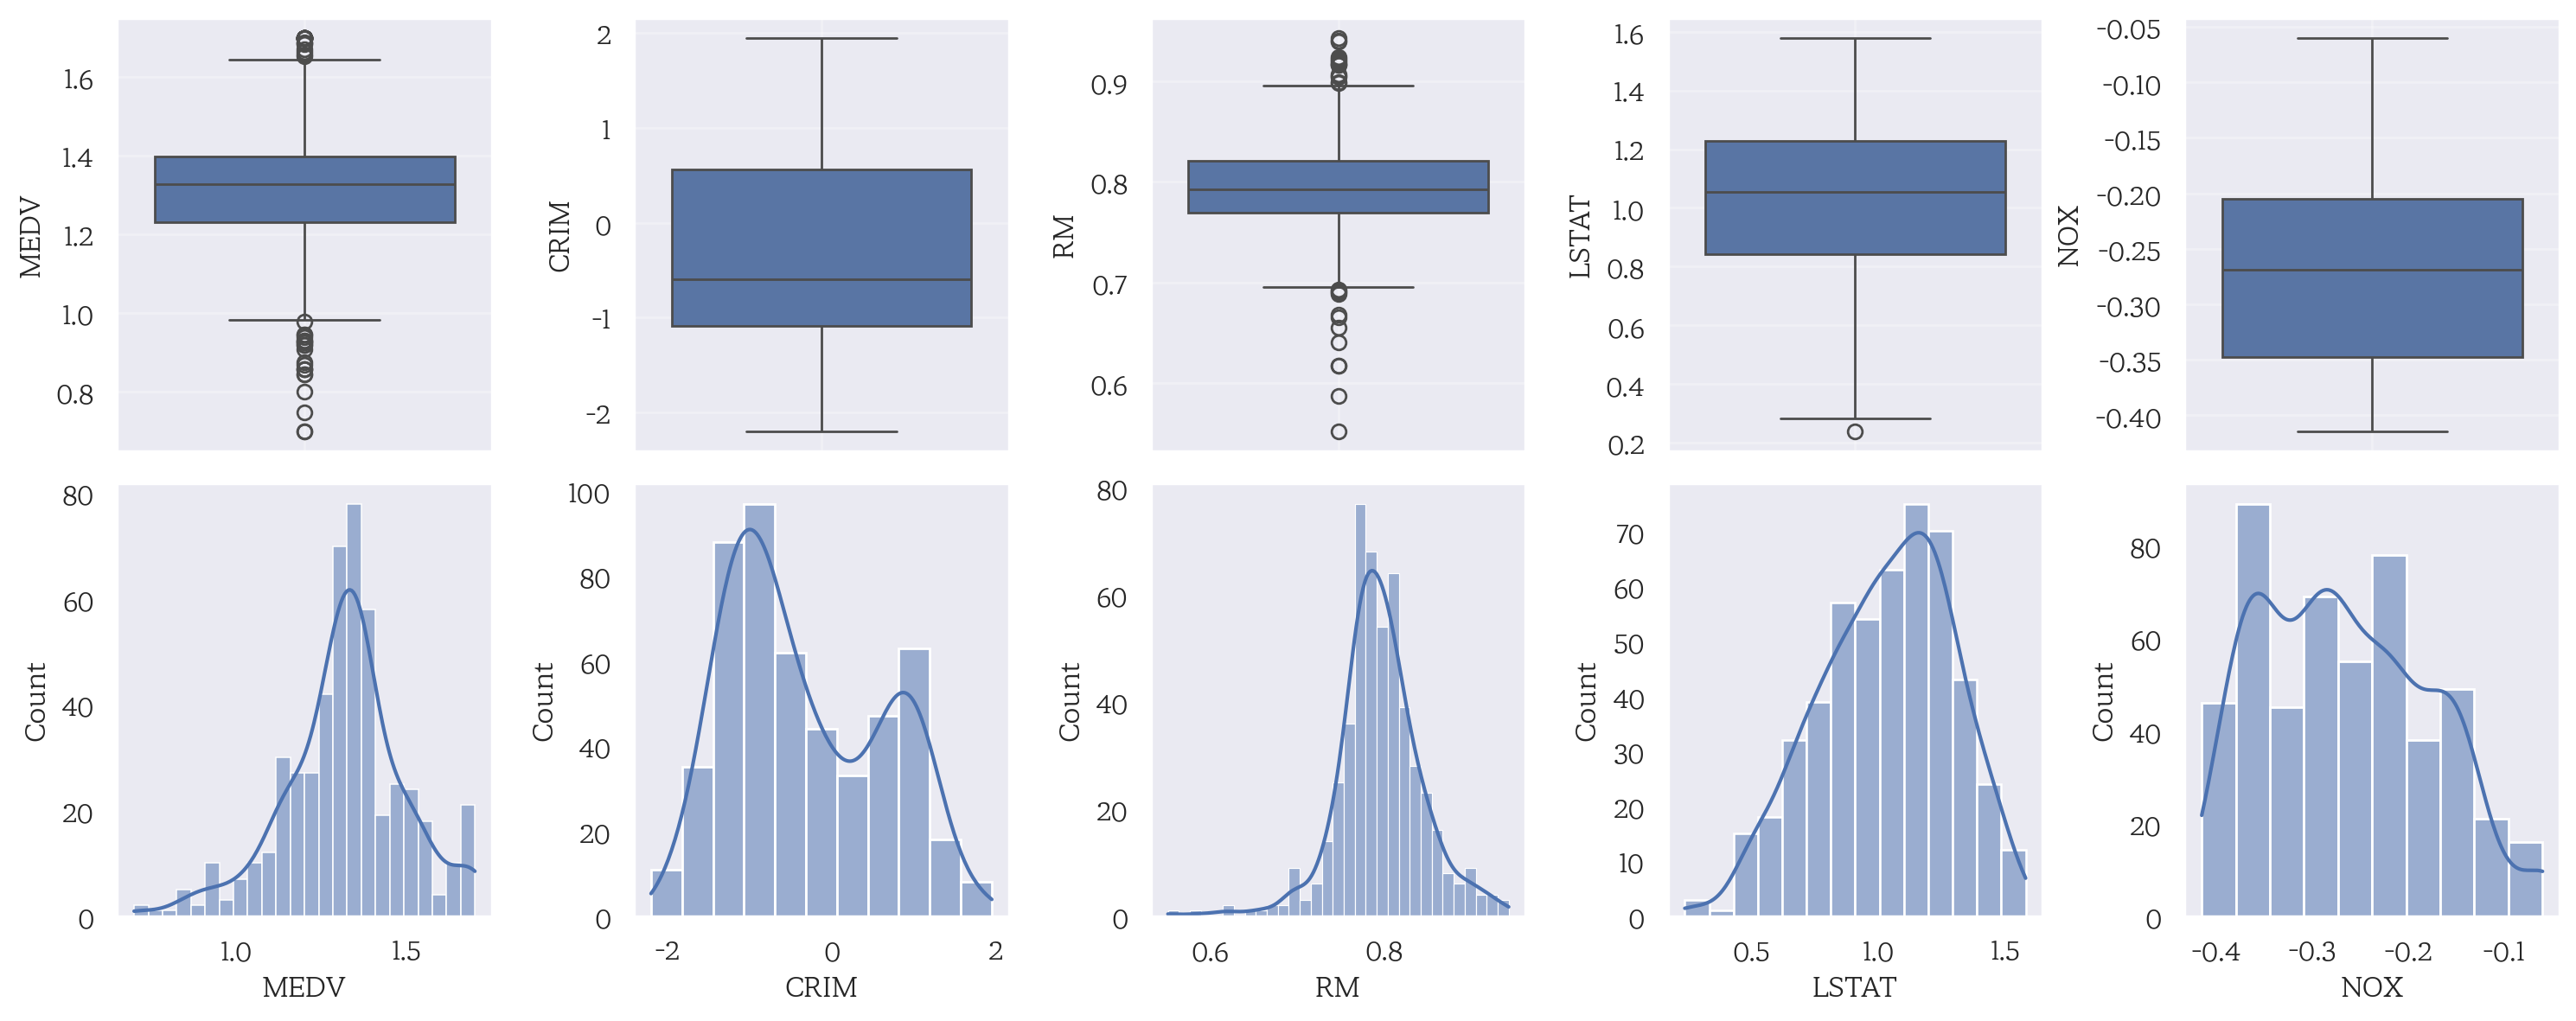

In [13]:
width_px = 3000
height_px = 1200
rows = 2
cols = 5
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, col in enumerate(['MEDV','CRIM','RM','LSTAT','NOX']):
    data = df1[df1[col]>0][col]
    log_data = np.log10(data)

# box 그리기
    sb.boxplot(data=log_data, orient = 'v', ax=ax[0][i])
    ax[0][i].grid(True, alpha = 0.3)

    sb.histplot(data=log_data, kde = True, ax=ax[1][i])
    ax[0][i].grid(True, alpha = 0.3)


# 출력
plt.tight_layout()
plt.show()
plt.close()

In [14]:
df1.describe(include = 'category')

,CHAS
count,506
unique,2
top,0
freq,471


In [18]:
origin.groupby('CHAS')['MEDV'].describe()

,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0
